In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
          classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'sheep', 'bird', 'cat', 'dog', 'Horse', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000029358E0EED0>

In [18]:
img = cv2.imread('bird.png')

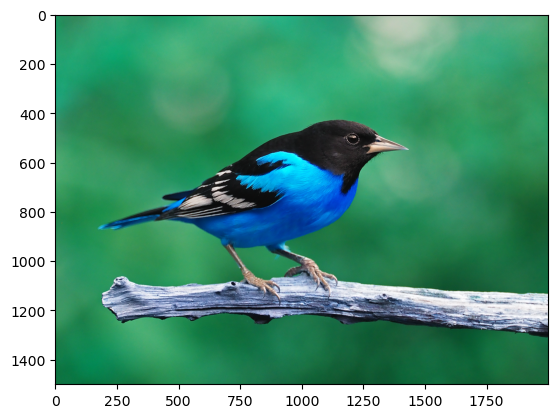

In [19]:
plt.imshow(img)

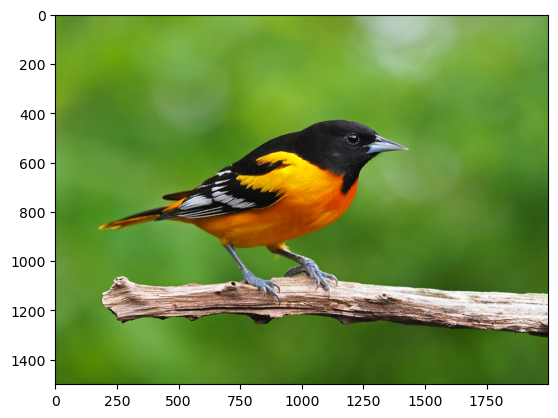

In [20]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [21]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [22]:
print(ClassIndex)

[16]


In [23]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255, 0, 0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, font_scale, color=(0, 0, 0), thickness=3)

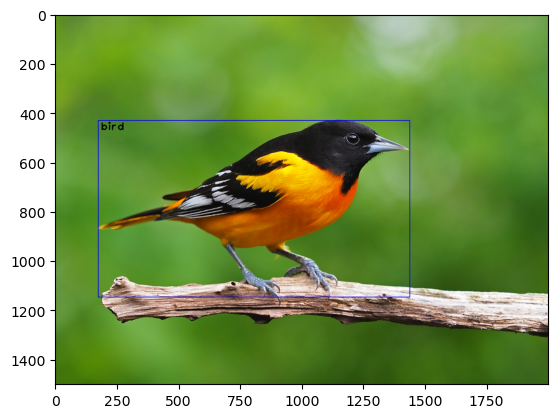

In [24]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [25]:
cap = cv2.VideoCapture("nature.mp4")

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Can't open video")
        
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.5)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, font_scale, color=(0, 255, 0), thickness=3)
    
    cv2.imshow('Object Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap=release()
cv2.destroyAllWindows()

()
()
[19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19]
[19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19 19]
[19 19 19 19 19 19 19 19 19 19]
[19 1

[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 

[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[23]
[16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16 16]
[16 16 16 16 16 16 16]
[16 16 16 16 16 16 16]
[16 16 16 16 16 16 16]
[16 16 16 16 16 16]
[16 16 16 16 16 16 16]
[16 16 16 16 16 16 16]
[16 16 16 16 

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
